In [2]:
#import ujson as json
import pandas as pd
import numpy as np
from PIL import Image as im
from functools import partial
import keras
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from keras import applications

In [3]:
def pic_appender(picName, pic):
    lister = []
    lister.append(picName)
    lister.append(pic)
    return lister

In [5]:
AirPics = np.load("./Dataset/full_numpy_bitmap_airplane.npy")
TreePics = np.load("./Dataset/full_numpy_bitmap_tree.npy")
boatPics = np.load("./Dataset/full_numpy_bitmap_sailboat.npy")
sunPics = np.load("./Dataset/full_numpy_bitmap_sun.npy")
wheelPics = np.load("./Dataset/full_numpy_bitmap_wheel.npy")
pencilPics = np.load("./Dataset/full_numpy_bitmap_pencil.npy")
doorPics = np.load("./Dataset/full_numpy_bitmap_door.npy")
fishPics = np.load("./Dataset/full_numpy_bitmap_fish.npy")
smilePics = np.load("./Dataset/full_numpy_bitmap_smiley face.npy")
shirtPics = np.load("./Dataset/full_numpy_bitmap_t-shirt.npy")

over = []
for x in range(100000):
    over.append(pic_appender("Airplane", AirPics[x]))
    over.append(pic_appender("Tree", TreePics[x]))
    over.append(pic_appender("Sail Boat", boatPics[x]))
    over.append(pic_appender("Sun", sunPics[x]))
    over.append(pic_appender("Wheel", wheelPics[x]))
    over.append(pic_appender("Pencil", pencilPics[x]))
    over.append(pic_appender("Door", doorPics[x]))
    over.append(pic_appender("Fish", fishPics[x]))
    over.append(pic_appender("Smiley Face", smilePics[x]))
    over.append(pic_appender("T-Shirt", shirtPics[x]))
    
    
df = pd.DataFrame(over)


FileNotFoundError: ignored

In [ ]:
#df[0] = LabelEncoder().fit_transform(df[0])
df=df.drop(0, axis=1)
df

,1
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
999995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
999996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
999997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
999998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
#array=np.reshape(df.iloc[1, 1], (28,28))

In [ ]:
#data = im.fromarray(array)

In [ ]:
X_train = np.zeros((100000, 28, 28, 1))
for x in range(100000):
    df.iloc[x,0]=np.reshape(df.iloc[x,0],(28, 28, 1))
    X_train[x]=(df.iloc[x,0])
    
#y_train=OrdinalEncoder().fit_transform(np.reshape(df[0])

y_list =[]


for i in range(10000):
    y_list.append(0)
    y_list.append(1)
    y_list.append(2)
    y_list.append(3)
    y_list.append(4)
    y_list.append(5)
    y_list.append(6)
    y_list.append(7)
    y_list.append(8)
    y_list.append(9)

y_train=np.array(y_list)

In [ ]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation = 'relu', padding="SAME")


model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=3, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=512),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=300, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=150, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])


In [ ]:
#fit the model
history = model.fit(X_train, y_train, epochs = 30, validation_split=0.2)

Train on 80000 samples, validate on 20000 samples
Epoch 1/30
80000/80000 [==============================] - 11s 139us/step - loss: 0.5352 - accuracy: 0.8390 - val_loss: 0.1706 - val_accuracy: 0.9506
Epoch 2/30
80000/80000 [==============================] - 11s 142us/step - loss: 0.2093 - accuracy: 0.9447 - val_loss: 0.1467 - val_accuracy: 0.9568
Epoch 3/30
80000/80000 [==============================] - 12s 145us/step - loss: 0.1658 - accuracy: 0.9550 - val_loss: 0.1312 - val_accuracy: 0.9632
Epoch 4/30
80000/80000 [==============================] - 12s 146us/step - loss: 0.1398 - accuracy: 0.9612 - val_loss: 0.1213 - val_accuracy: 0.9658
Epoch 5/30
80000/80000 [==============================] - 12s 146us/step - loss: 0.1215 - accuracy: 0.9662 - val_loss: 0.1177 - val_accuracy: 0.9682
Epoch 6/30
80000/80000 [==============================] - 12s 147us/step - loss: 0.1084 - accuracy: 0.9686 - val_loss: 0.1165 - val_accuracy: 0.9685
Epoch 7/30
80000/80000 [==============================] 

In [ ]:
def plot(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1.5) # set the vertical range to 0-1
    plt.show()

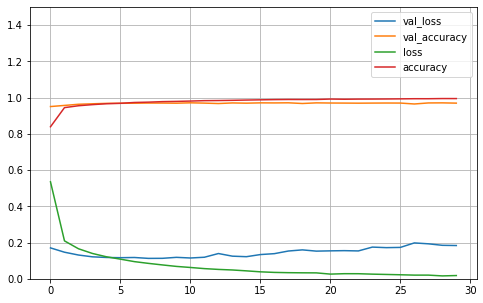

In [ ]:
plot(history)

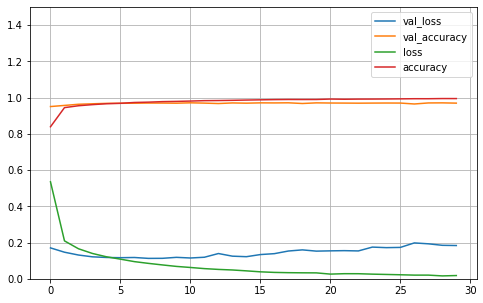

In [ ]:
plot(history)

In [ ]:
newModel = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=3, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=150, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

newModel.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [ ]:
history2 = newModel.fit(X_train, y_train, epochs = 30, validation_split=0.2)

Train on 80000 samples, validate on 20000 samples
Epoch 1/30
80000/80000 [==============================] - 7s 83us/step - loss: 2.2401 - accuracy: 0.5274 - val_loss: 0.6017 - val_accuracy: 0.8231
Epoch 2/30
80000/80000 [==============================] - 7s 83us/step - loss: 0.6946 - accuracy: 0.7955 - val_loss: 0.4612 - val_accuracy: 0.8642
Epoch 3/30
80000/80000 [==============================] - 7s 84us/step - loss: 0.5621 - accuracy: 0.8381 - val_loss: 0.3950 - val_accuracy: 0.8846
Epoch 4/30
80000/80000 [==============================] - 7s 84us/step - loss: 0.4834 - accuracy: 0.8613 - val_loss: 0.3629 - val_accuracy: 0.8924
Epoch 5/30
80000/80000 [==============================] - 7s 85us/step - loss: 0.4375 - accuracy: 0.8747 - val_loss: 0.3509 - val_accuracy: 0.8970
Epoch 6/30
80000/80000 [==============================] - 7s 86us/step - loss: 0.4037 - accuracy: 0.8850 - val_loss: 0.3062 - val_accuracy: 0.9107
Epoch 7/30
80000/80000 [==============================] - 7s 86us/st

In [1]:
plot(history2)

NameError: ignored

In [ ]:
newModel.save("Final_Model")

## Testing

In [ ]:
predictions=newModel.predict(np.reshape(wheelPics[10232],(1,28,28,1)))

In [ ]:
classify(predictions)

Its a Wheel


In [ ]:
data = im.fromarray(np.reshape(sunPics[10232],(28,28)))
data

In [ ]:
def classify(prediction):
    value = np.argmax(prediction, axis=1)
    if(value == 0):
        print('Its an Airplane')
    if(value == 1):
        print('Its a Tree')
    if(value == 2):
        print('Its a Sailboat')
    if(value == 3):
        print('Its a Sun')
    if(value == 4):
        print('Its a Wheel')
    if(value == 5):
        print('Its a Pencil')
    if(value == 6):
        print('Its a Door')
    if(value == 7):
        print('Its a Fish')
    if(value == 8):
        print('Its a Smiley Face')
    if(value == 9):
        print('Its a T-shirt')

In [ ]:
X_test = np.zeros((28, 28))
for x in range(1000):
    df.iloc[x+100000,0]=np.reshape(df.iloc[x+100000,0],(28, 28))
    X_test[x]=(df.iloc[x+10000,0])